# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/tmp/ipykernel_253566/2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
# 把数据切分成70%的训练集，30%的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 查看训练集跟测试集的维度---原来数据集的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape

((76053, 10), (32595, 10), (76053,), (32595,), (108648, 10))

Text(0.5, 0, 'Catalog')

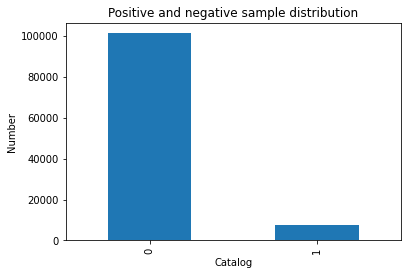

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
data_counts = data['SeriousDlqin2yrs'].value_counts()

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt
fig = plt.figure()
data_counts.plot(kind='bar')
plt.title('Positive and negative sample distribution')
plt.ylabel('Number')
plt.xlabel('Catalog')


#### 2.数据预处理之离散化

In [8]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
low = min(data['age'])
high = max(data['age'])

bins = list(range(int(low), int(high), 3))  # 以3岁为一个区间

# 使用 cut 函数进行离散化
data['age_group'] = pd.cut(data['age'], bins)

#### 3.数据预处理之独热向量编码

In [9]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
# 对年龄段进行独热向量编码
one_hot_encoded = pd.get_dummies(data['age_group'], prefix='age_group')

# 将独热编码结果与原始 DataFrame 进行合并
data = pd.concat([data, one_hot_encoded], axis=1)

data


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group,"age_group_(0, 3]","age_group_(3, 6]","age_group_(6, 9]","age_group_(9, 12]","age_group_(12, 15]","age_group_(15, 18]","age_group_(18, 21]","age_group_(21, 24]","age_group_(24, 27]","age_group_(27, 30]","age_group_(30, 33]","age_group_(33, 36]","age_group_(36, 39]","age_group_(39, 42]","age_group_(42, 45]","age_group_(45, 48]","age_group_(48, 51]","age_group_(51, 54]","age_group_(54, 57]","age_group_(57, 60]","age_group_(60, 63]","age_group_(63, 66]","age_group_(66, 69]","age_group_(69, 72]","age_group_(72, 75]","age_group_(75, 78]","age_group_(78, 81]","age_group_(81, 84]","age_group_(84, 87]","age_group_(87, 90]","age_group_(90, 93]","age_group_(93, 96]","age_group_(96, 99]","age_group_(99, 102]"
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,"(42, 45]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,"(39, 42]",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,"(36, 39]",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,"(27, 30]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,"(48, 51]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0,"(48, 51]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112911,0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0,"(72, 75]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
112912,0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0,"(42, 45]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112913,0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0,"(27, 30]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4.数据预处理之幅度缩放

In [10]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [11]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
import seaborn as sns

lr = LogisticRegression(C=1000.0,random_state=0, penalty='l2', solver='liblinear') 
lr.fit(X_train_std, y_train)
# 输出系数
coefficients = lr.coef_
intercept = lr.intercept_

print("系数：", coefficients)
print("截距：", intercept)

系数： [[-0.01427294 -0.36429202  1.72869067  0.31207913 -0.11534462 -0.09187206
   1.68994946 -0.19639706 -3.2487085   0.11638382]]
截距： [-2.85903863]


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [12]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
# 设置参数候选
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 500]
}

# 初始化 GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5)

# 执行网格搜索交叉验证
grid_search.fit(X_train_std, y_train)

# 输出最佳参数
print("最佳参数：", grid_search.best_params_)

# 输出最佳模型
best_model = grid_search.best_estimator_
print("最佳模型：", best_model)

# 在测试集上评估最佳模型
accuracy = best_model.score(X_test_std, y_test)
print("在测试集上的准确率：", accuracy)


最佳参数： {'C': 1, 'penalty': 'l1'}
最佳模型： LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')
在测试集上的准确率： 0.9339162448228255


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

准确率： 0.9339162448228255
查全率： 0.046061722708429294
AUC： 0.6979862258129022
F1值： 0.08496176720475784
混淆矩阵：
[[30341    83]
 [ 2071   100]]


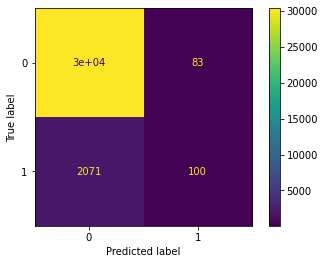

In [13]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score,ConfusionMatrixDisplay

# 在测试集上进行预测
y_pred = best_model.predict(X_test_std)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

# 计算查全率
recall = recall_score(y_test, y_pred)
print("查全率：", recall)

# 计算AUC
y_pred_proba = best_model.predict_proba(X_test_std)[:, 1]  # 预测为正例的概率
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC：", auc)

# 计算F1值
f1 = f1_score(y_test, y_pred)
print("F1值：", f1)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("混淆矩阵：")
print(cm)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp_lr.plot()
plt.show()


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [14]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
import numpy as np
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # 根据阈值确定最终的分类结果
    y_pred_threshold = np.where(y_pred_proba > threshold, 1, 0)

    # 计算混淆矩阵
    cm_threshold = confusion_matrix(y_test, y_pred_threshold)
    print("阈值为", threshold, "时的混淆矩阵：")
    print(cm_threshold)

    # 计算准确率
    accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
    print("阈值为", threshold, "时的准确率：", accuracy_threshold)

    # 计算查全率
    recall_threshold = recall_score(y_test, y_pred_threshold)
    print("阈值为", threshold, "时的查全率：", recall_threshold)

    # 计算AUC
    auc_threshold = roc_auc_score(y_test, y_pred_threshold)
    print("阈值为", threshold, "时的AUC：", auc_threshold)

    # 计算F1值
    f1_threshold = f1_score(y_test, y_pred_threshold)
    print("阈值为", threshold, "时的F1值：", f1_threshold)

    print("--------------------")


阈值为 0.1 时的混淆矩阵：
[[26778  3646]
 [ 1253   918]]
阈值为 0.1 时的准确率： 0.8497008743672343
阈值为 0.1 时的查全率： 0.42284661446338095
阈值为 0.1 时的AUC： 0.6515035070739202
阈值为 0.1 时的F1值： 0.2726057906458797
--------------------
阈值为 0.2 时的混淆矩阵：
[[29799   625]
 [ 1754   417]]
阈值为 0.2 时的准确率： 0.9270133456051541
阈值为 0.2 时的查全率： 0.19207738369415017
阈值为 0.2 时的AUC： 0.5857671956598545
阈值为 0.2 时的F1值： 0.25957049486461253
--------------------
阈值为 0.3 时的混淆矩阵：
[[30178   246]
 [ 1927   244]]
阈值为 0.3 时的准确率： 0.9333333333333333
阈值为 0.3 时的查全率： 0.11239060340856748
阈值为 0.3 时的AUC： 0.5521524408049937
阈值为 0.3 时的F1值： 0.18338970311912817
--------------------
阈值为 0.4 时的混淆矩阵：
[[30291   133]
 [ 2018   153]]
阈值为 0.4 时的准确率： 0.9340082834790612
阈值为 0.4 时的查全率： 0.07047443574389682
阈值为 0.4 时的AUC： 0.5330514434833079
阈值为 0.4 时的F1值： 0.12454212454212456
--------------------
阈值为 0.5 时的混淆矩阵：
[[30341    83]
 [ 2071   100]]
阈值为 0.5 时的准确率： 0.9339162448228255
阈值为 0.5 时的查全率： 0.046061722708429294
阈值为 0.5 时的AUC： 0.5216668066605518
阈值为 0.5 时的F1值： 0.084961767

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

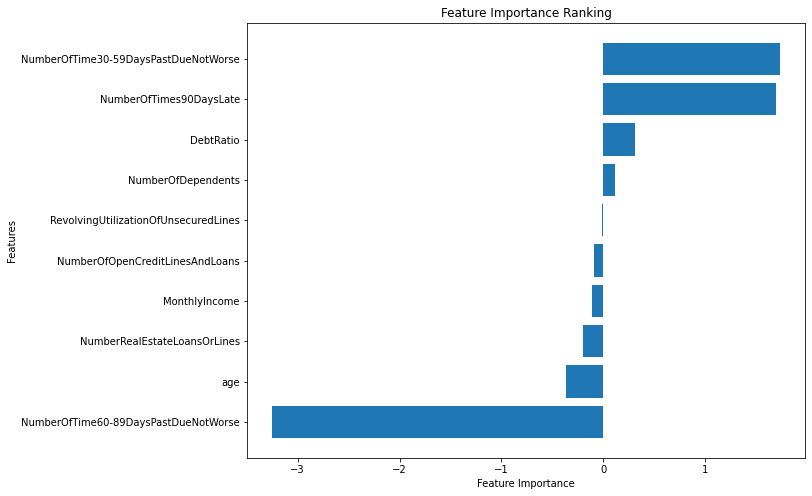

In [15]:
import matplotlib.pyplot as plt

feat_labels = data.columns[1:]

# 获取特征重要性
feature_importance = lr.coef_[0]  # 假设model是你之前训练的逻辑回归模型

# 将特征重要性进行排序
sorted_idx = feature_importance.argsort()

# 创建水平条形图
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feat_labels)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()


In [16]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.feature_selection import SelectFromModel


# 使用 SelectFromModel 进行特征选择
selector = SelectFromModel(lr)
selector.fit(X_train_std, y_train)

# 获取选择的特征索引
selected_features = selector.get_support(indices=True)

# # 根据选择的特征重新构建训练集和测试集
X_train_selected = X_train_std[:, selected_features]
X_test_selected = X_test_std[:, selected_features]

# 在选择的特征上重新训练模型
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# 在测试集上进行预测
y_pred_selected = model_selected.predict(X_test_selected)

# 计算准确率
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("特征选择后的模型准确率：", accuracy_selected)

# 计算查全率
recall_selected = recall_score(y_test, y_pred_selected)
print("特征选择后的模型查全率：", recall_selected)

# 计算AUC
auc_selected = roc_auc_score(y_test, y_pred_selected)
print("特征选择后的模型AUC：", auc_selected)

# 计算F1值
f1_selected = f1_score(y_test, y_pred_selected)
print("特征选择后的模型F1值：", f1_selected)


特征选择后的模型准确率： 0.9339469243749041
特征选择后的模型查全率： 0.036849378166743434
特征选择后的模型AUC： 0.5174057566615994
特征选择后的模型F1值： 0.06917423259835712


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier



In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score, roc_curve, auc

# 定义参数网格
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10]
}

param_grid_svm = {
    'C': [0.1, 1],
    'gamma': [0.1,1]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree']
}

# 创建分类器对象
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()

# 创建网格搜索对象
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5)
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5)
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5)

# 在训练集上进行网格搜索
grid_search_rf.fit(X_train_std, y_train)
grid_search_svm.fit(X_train_std, y_train)
grid_search_knn.fit(X_train_std, y_train)

# 输出最佳参数组合和对应的得分
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best Score:", grid_search_rf.best_score_)
print("SVM - Best Parameters:", grid_search_svm.best_params_)
print("SVM - Best Score:", grid_search_svm.best_score_)
print("KNN - Best Parameters:", grid_search_knn.best_params_)
print("KNN - Best Score:", grid_search_knn.best_score_)



/home/dk/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/dk/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Best Score: 0.935492337006019
SVM - Best Parameters: {'C': 1, 'gamma': 1}
SVM - Best Score: 0.9344404476310031
KNN - Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
KNN - Best Score: 0.9333754150632625


/home/dk/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest - Precision: 0.615071283095723
Random Forest - Recall: 0.13910640257945647
Random Forest - F1 Score: 0.22689706987227648
Random Forest - AUC: 0.8532556239086381
SVM - Precision: 0.6153846153846154
SVM - Recall: 0.07369875633348687
SVM - F1 Score: 0.1316330728095434
SVM - AUC: 0.6692492308612815
KNN - Precision: 0.5091324200913242
KNN - Recall: 0.10271764163979732
KNN - F1 Score: 0.1709467228823304


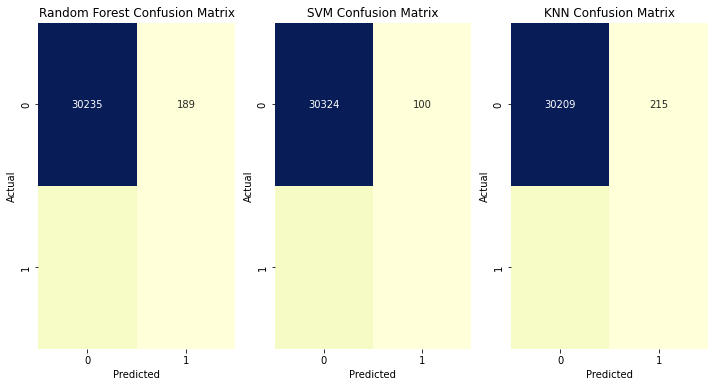

In [22]:


# 使用最佳参数进行训练
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_knn = grid_search_knn.best_estimator_

best_rf.fit(X_train_std, y_train)
best_svm.fit(X_train_std, y_train)
best_knn.fit(X_train_std, y_train)

# 预测
y_pred_rf = best_rf.predict(X_test_std)
y_pred_svm = best_svm.predict(X_test_std)
y_pred_knn = best_knn.predict(X_test_std)

# 计算评估指标
precision_rf = precision_score(y_test, y_pred_rf)
precision_svm = precision_score(y_test, y_pred_svm)
precision_knn = precision_score(y_test, y_pred_knn)

recall_rf = recall_score(y_test, y_pred_rf)
recall_svm = recall_score(y_test, y_pred_svm)
recall_knn = recall_score(y_test, y_pred_knn)

f1_rf = f1_score(y_test, y_pred_rf)
f1_svm = f1_score(y_test, y_pred_svm)
f1_knn = f1_score(y_test, y_pred_knn)

auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test_std)[:, 1])
auc_svm = roc_auc_score(y_test, best_svm.decision_function(X_test_std))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_rf.predict_proba(X_test_std)[:, 1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, best_svm.decision_function(X_test_std))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# 输出评估指标
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)
print("Random Forest - AUC:", auc_rf)
print("SVM - Precision:", precision_svm)
print("SVM - Recall:", recall_svm)
print("SVM - F1 Score:", f1_svm)
print("SVM - AUC:", auc_svm)
print("KNN - Precision:", precision_knn)
print("KNN - Recall:", recall_knn)
print("KNN - F1 Score:", f1_knn)

# 绘制混淆矩阵
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()
